# Matriz de correlação entre ativos no Python! Ações, FIIs, ETFs, BDRs

### 1.0 - Importando bibliotecas

In [1]:
import pandas as pd
import yfinance as yf
import fundamentus as fd
import seaborn as sns
import matplotlib.pyplot as plt

2023-10-08 12:47:29,304 [logging.log_init] INFO: LOGLEVEL=INFO


### 2.0 - Importando dados

#### 2.1 - Parâmetros iniciais

In [2]:
start_date = '2017-01-01'
end_date = '2023-09-25'

#### 2.2 - Moedas, índices e Criptos

In [3]:
cesta = ['USDBRL=X', 'EURBRL=X', '^BVSP', '^GSPC', 'BTC-USD','SMAL11.SA']

In [4]:
cesta = yf.download(cesta, start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [5]:
cesta.index = pd.to_datetime(cesta.index)

In [6]:
cesta.head()

,BTC-USD,EURBRL=X,SMAL11.SA,USDBRL=X,^BVSP,^GSPC
Date,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,NaN,NaN
2017-01-02,1021.750000,3.4190,54.000000,3.2532,59589.0,NaN
2017-01-03,1043.839966,3.4320,55.450001,3.2840,61814.0,2257.830078
2017-01-04,1154.729980,3.3976,56.990002,3.2635,61589.0,2270.750000
2017-01-05,1013.380005,3.3732,56.990002,3.2141,62071.0,2269.000000


In [7]:
cesta.rename(columns= {'USDBRL=X': 'USDBRL',
                         'EURBRL=X': 'EURBRL',
                         '^BVSP': 'IBOV',
                         '^GSPC': 'SP500',
                         'BTC-USD': 'BTCUSD',
                         'SMAL11.SA': 'SMALLCAP'},
                         inplace= True)

In [8]:
cesta.head()

,BTCUSD,EURBRL,SMALLCAP,USDBRL,IBOV,SP500
Date,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,NaN,NaN
2017-01-02,1021.750000,3.4190,54.000000,3.2532,59589.0,NaN
2017-01-03,1043.839966,3.4320,55.450001,3.2840,61814.0,2257.830078
2017-01-04,1154.729980,3.3976,56.990002,3.2635,61589.0,2270.750000
2017-01-05,1013.380005,3.3732,56.990002,3.2141,62071.0,2269.000000


#### 2.3 - Ações

2.3.1 - Coletando dados para escolha das ações

In [9]:
# A biblioteca só pega o resultado do último balanço apresentado das empresas

df_acoes = fd.get_resultado()

In [10]:
df_acoes.head()

Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
papel,,,,,,,,,,,,,,,,,,,,
AALR3,8.65,-3.57,1.18,0.904,0.0000,0.406,-3.18,-604.03,-0.83,-1132.73,16.71,-0.0015,-0.2460,-0.0007,-0.3311,0.55,5582600.0,8.653780e+08,1.15,0.0306
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1489,0.00,0.0,5.420810e+09,0.00,0.1728
ABCB4,19.77,5.54,0.82,0.000,0.0793,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.1489,0.00,15481300.0,5.420810e+09,0.00,0.1728
ABEV3,13.22,14.59,2.45,2.518,0.0576,1.562,1029.30,12.78,-16.52,12.26,8.98,0.1970,0.1779,0.1576,0.1678,1.01,353251000.0,8.507460e+10,0.05,0.1416
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,0.0278,-0.0082,2.09,0.0,2.920600e+08,1.31,0.1641


2.3.2 - Executado filtro conforme parâmetros abaixo:

Preço/Lucro > 0

Ev/Ebit < 10 

ROE > 15%

ROIC > 15%

Dívida Bruta Total / PL < 1

Patrimônio Líquido > 0

Volume médio de transação (2 meses) : R$ 2.250.000,00


In [11]:
filtro_df_acoes = df_acoes[(df_acoes.pl > 0) 
                           & (df_acoes.evebit < 10) 
                           & (df_acoes.roe > 0.15) 
                           & (df_acoes.roic > 0.15) 
                           & (df_acoes.divbpatr < 0.5) 
                           & (df_acoes.patrliq > 0) 
                           & (df_acoes.liq2m > 2250000)
                           ]

In [12]:
filtro_df_acoes[['pl','evebit','roe','roic','divbpatr','patrliq','liq2m']]

Multiples,pl,evebit,roe,roic,divbpatr,patrliq,liq2m
papel,,,,,,,
BLAU3,9.02,7.22,0.1663,0.1890,0.13,1.873920e+09,1.079500e+07
FESA4,6.25,4.67,0.2119,0.2557,0.10,3.220380e+09,1.067720e+07
FRAS3,14.34,7.57,0.1559,0.2171,0.47,1.895920e+09,6.786990e+06
GGBR4,4.48,4.02,0.1952,0.1939,0.22,4.897690e+10,2.625190e+08
KEPL3,6.59,5.11,0.4685,0.4361,0.23,6.686540e+08,1.650850e+07
LEVE3,8.97,7.77,0.4955,0.3632,0.35,1.425640e+09,1.526200e+07
ODPV3,13.71,8.99,0.3332,0.3756,0.00,1.361670e+09,1.544570e+07
PSSA3,9.40,0.25,0.1629,0.6076,0.00,1.145920e+10,4.851470e+07
RECV3,5.87,5.21,0.2312,0.1943,0.14,4.314600e+09,6.746310e+07


In [13]:
index_acoes = filtro_df_acoes.index
index_acoes

Index(['BLAU3', 'FESA4', 'FRAS3', 'GGBR4', 'KEPL3', 'LEVE3', 'ODPV3', 'PSSA3',
       'RECV3', 'TASA4', 'TGMA3', 'VALE3'],
      dtype='object', name='papel')

In [14]:
acoes = []

for elem in index_acoes:
    elem = elem + '.SA'
    acoes.append(elem)

acoes

['BLAU3.SA',
 'FESA4.SA',
 'FRAS3.SA',
 'GGBR4.SA',
 'KEPL3.SA',
 'LEVE3.SA',
 'ODPV3.SA',
 'PSSA3.SA',
 'RECV3.SA',
 'TASA4.SA',
 'TGMA3.SA',
 'VALE3.SA']

2.3.3 - Fazendo download das ações selecionadas pelo filtro

In [15]:
acoes = yf.download(acoes, start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  12 of 12 completed


In [16]:
acoes.index = pd.to_datetime(acoes.index)

In [17]:
acoes.head()

,BLAU3.SA,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,PSSA3.SA,RECV3.SA,TASA4.SA,TGMA3.SA,VALE3.SA
Date,,,,,,,,,,,,
2017-01-02,NaN,5.269834,3.318753,7.242332,1.862148,12.983634,9.995230,8.460324,NaN,1.575257,5.395240,15.886397
2017-01-03,NaN,5.374531,3.334189,7.449445,1.903885,13.689197,10.043632,8.626955,NaN,1.601080,5.453021,16.590067
2017-01-04,NaN,5.500171,3.341907,7.362592,1.934921,14.426261,9.922628,8.809299,NaN,1.497785,5.713031,16.292116
2017-01-05,NaN,5.521110,3.426805,7.883720,1.946693,14.646749,9.688679,8.711841,NaN,1.549433,6.059713,16.913374
2017-01-06,NaN,5.549028,3.388216,7.836948,1.883551,14.363263,9.478929,8.548357,NaN,1.506393,5.987489,16.463278


In [18]:
acoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1676 entries, 2017-01-02 to 2023-09-22
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BLAU3.SA  609 non-null    float64
 1   FESA4.SA  1676 non-null   float64
 2   FRAS3.SA  1676 non-null   float64
 3   GGBR4.SA  1676 non-null   float64
 4   KEPL3.SA  1676 non-null   float64
 5   LEVE3.SA  1676 non-null   float64
 6   ODPV3.SA  1676 non-null   float64
 7   PSSA3.SA  1676 non-null   float64
 8   RECV3.SA  598 non-null    float64
 9   TASA4.SA  1676 non-null   float64
 10  TGMA3.SA  1676 non-null   float64
 11  VALE3.SA  1676 non-null   float64
dtypes: float64(12)
memory usage: 170.2 KB


In [19]:
# # Removendo empresas com poucos dados

# acoes.drop(['BLAU3.SA','RECV3'], axis= 1)

#### 2.4 - FII

In [20]:
fii = ['BRCR11.SA', 
       'BTLG11.SA', 
       'VINO11.SA', 
       'VILG11.SA',
       'HGRE11.SA',
       'HGLG11.SA',
       'XPML11.SA', 
       'HSML11.SA', 
       'KNCR11.SA'
       ]

In [21]:
fii = yf.download(fii, start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  9 of 9 completed


In [22]:
fii.index = pd.to_datetime(fii.index)

In [23]:
fii.head()

,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,VINO11.SA,XPML11.SA
Date,,,,,,,,,
2017-01-02,81.046227,50.713215,93.550018,109.024010,NaN,90.227684,NaN,NaN,NaN
2017-01-03,81.339432,50.678539,93.550018,109.374008,NaN,90.689911,NaN,NaN,NaN
2017-01-04,80.836800,50.678539,93.550018,108.061531,NaN,89.653893,NaN,NaN,NaN
2017-01-05,80.627388,51.155411,93.550018,109.190262,NaN,88.458534,NaN,NaN,NaN
2017-01-06,81.255630,52.117825,93.550018,109.374008,NaN,88.442581,NaN,NaN,NaN


### 3.0 - Tratamento dos dados

Por ter dados em moedas diferentes, será necessário alterar tudo para uma única moeda, no caso farei o estudo utilizando o Real brasileiro.

#### 3.1 - Juntando os DataFrames 

In [24]:
main_df = pd.merge(cesta,
                    acoes,
                    left_index= True,
                    right_index= True,
                    how= 'inner')

main_df.tail()

,BTCUSD,EURBRL,SMALLCAP,USDBRL,IBOV,SP500,BLAU3.SA,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,PSSA3.SA,RECV3.SA,TASA4.SA,TGMA3.SA,VALE3.SA
Date,,,,,,,,,,,,,,,,,,
2023-09-18,26754.281250,5.1653,105.449997,4.8670,118288.0,4453.529785,16.650000,50.009998,14.77,24.940001,11.96,51.029999,10.667602,26.736137,22.389999,16.58,26.090000,68.720001
2023-09-19,27211.117188,5.1852,104.430000,4.8537,117846.0,4443.950195,16.760000,50.040001,15.12,24.590000,11.95,51.619999,10.796725,26.904289,22.299999,16.41,26.250000,68.849998
2023-09-20,27132.007812,5.2004,104.699997,4.8658,118695.0,4402.200195,16.530001,50.480000,15.38,24.969999,11.92,52.520000,10.985445,26.983419,21.770000,16.52,26.430000,69.309998
2023-09-21,26567.632812,5.1973,102.150002,4.8788,116145.0,4330.000000,16.299999,49.450001,15.55,24.389999,11.73,49.520000,11.164231,26.864723,20.990000,16.16,25.840000,67.500000
2023-09-22,26579.568359,5.2564,101.349998,4.9349,116009.0,4320.060059,15.920000,48.799999,15.68,24.260000,11.50,49.799999,11.064906,26.746029,20.450001,16.10,25.799999,68.000000


In [25]:
main_df = pd.merge(main_df,
                    fii,
                    left_index= True,
                    right_index= True,
                    how= 'inner')

main_df.tail()

,BTCUSD,EURBRL,SMALLCAP,USDBRL,IBOV,SP500,BLAU3.SA,FESA4.SA,FRAS3.SA,GGBR4.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,VINO11.SA,XPML11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-18,26754.281250,5.1653,105.449997,4.8670,118288.0,4453.529785,16.650000,50.009998,14.77,24.940001,...,68.720001,63.209999,102.750000,160.588577,136.790253,94.002670,98.682320,105.793861,8.846957,111.950005
2023-09-19,27211.117188,5.1852,104.430000,4.8537,117846.0,4443.950195,16.760000,50.040001,15.12,24.590000,...,68.849998,63.070000,102.559998,160.499191,136.412415,93.754639,98.276794,105.307060,8.837028,111.889999
2023-09-20,27132.007812,5.2004,104.699997,4.8658,118695.0,4402.200195,16.530001,50.480000,15.38,24.969999,...,69.309998,62.799999,101.879997,159.903275,136.849899,93.883614,98.533958,107.224449,8.856887,110.800003
2023-09-21,26567.632812,5.1973,102.150002,4.8788,116145.0,4330.000000,16.299999,49.450001,15.55,24.389999,...,67.500000,62.900002,101.900002,160.677963,137.207840,93.546295,98.365807,105.694511,8.827099,110.000000
2023-09-22,26579.568359,5.2564,101.349998,4.9349,116009.0,4320.060059,15.920000,48.799999,15.68,24.260000,...,68.000000,62.430000,101.500000,159.903275,138.102661,93.556221,97.920715,105.962753,8.787382,110.980003


#### 3.2 - Transformando a moeda de ativos dolarizados e removendo colunas em dólares.

In [26]:
main_df['BTCBRL'] = main_df['BTCUSD'] * main_df['USDBRL']

In [27]:
main_df['SP500BRL'] = main_df['SP500'] * main_df['USDBRL']

In [28]:
main_df = main_df.drop(['BTCUSD','SP500'], axis= 1)

In [29]:
main_df.tail()

,EURBRL,SMALLCAP,USDBRL,IBOV,BLAU3.SA,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,...,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,VINO11.SA,XPML11.SA,BTCBRL,SP500BRL
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-18,5.1653,105.449997,4.8670,118288.0,16.650000,50.009998,14.77,24.940001,11.96,51.029999,...,102.750000,160.588577,136.790253,94.002670,98.682320,105.793861,8.846957,111.950005,130213.089599,21675.329923
2023-09-19,5.1852,104.430000,4.8537,117846.0,16.760000,50.040001,15.12,24.590000,11.95,51.619999,...,102.559998,160.499191,136.412415,93.754639,98.276794,105.307060,8.837028,111.889999,132074.603873,21569.601778
2023-09-20,5.2004,104.699997,4.8658,118695.0,16.530001,50.480000,15.38,24.969999,11.92,52.520000,...,101.879997,159.903275,136.849899,93.883614,98.533958,107.224449,8.856887,110.800003,132018.921006,21420.225287
2023-09-21,5.1973,102.150002,4.8788,116145.0,16.299999,49.450001,15.55,24.389999,11.73,49.520000,...,101.900002,160.677963,137.207840,93.546295,98.365807,105.694511,8.827099,110.000000,129618.164716,21125.203633
2023-09-22,5.2564,101.349998,4.9349,116009.0,15.920000,48.799999,15.68,24.260000,11.50,49.799999,...,101.500000,159.903275,138.102661,93.556221,97.920715,105.962753,8.787382,110.980003,131167.506766,21319.063549


#### 3.3 - Preparando dados para matriz de correlação.

mínimo de dias para não prejudicar a análise. (252 * 3 = 1008) 3 anos

In [30]:
min_dias = 1008

In [31]:
retornos = main_df.pct_change()

In [32]:
retornos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1676 entries, 2017-01-02 to 2023-09-22
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EURBRL     1675 non-null   float64
 1   SMALLCAP   1675 non-null   float64
 2   USDBRL     1675 non-null   float64
 3   IBOV       1675 non-null   float64
 4   BLAU3.SA   608 non-null    float64
 5   FESA4.SA   1675 non-null   float64
 6   FRAS3.SA   1675 non-null   float64
 7   GGBR4.SA   1675 non-null   float64
 8   KEPL3.SA   1675 non-null   float64
 9   LEVE3.SA   1675 non-null   float64
 10  ODPV3.SA   1675 non-null   float64
 11  PSSA3.SA   1675 non-null   float64
 12  RECV3.SA   597 non-null    float64
 13  TASA4.SA   1675 non-null   float64
 14  TGMA3.SA   1675 non-null   float64
 15  VALE3.SA   1675 non-null   float64
 16  BRCR11.SA  1675 non-null   float64
 17  BTLG11.SA  1675 non-null   float64
 18  HGLG11.SA  1675 non-null   float64
 19  HGRE11.SA  1675 non-null   flo

In [33]:
retornos = retornos.dropna(thresh= min_dias, axis= 1)

In [34]:
retornos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1676 entries, 2017-01-02 to 2023-09-22
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EURBRL     1675 non-null   float64
 1   SMALLCAP   1675 non-null   float64
 2   USDBRL     1675 non-null   float64
 3   IBOV       1675 non-null   float64
 4   FESA4.SA   1675 non-null   float64
 5   FRAS3.SA   1675 non-null   float64
 6   GGBR4.SA   1675 non-null   float64
 7   KEPL3.SA   1675 non-null   float64
 8   LEVE3.SA   1675 non-null   float64
 9   ODPV3.SA   1675 non-null   float64
 10  PSSA3.SA   1675 non-null   float64
 11  TASA4.SA   1675 non-null   float64
 12  TGMA3.SA   1675 non-null   float64
 13  VALE3.SA   1675 non-null   float64
 14  BRCR11.SA  1675 non-null   float64
 15  BTLG11.SA  1675 non-null   float64
 16  HGLG11.SA  1675 non-null   float64
 17  HGRE11.SA  1675 non-null   float64
 18  HSML11.SA  1020 non-null   float64
 19  KNCR11.SA  1675 non-null   flo

In [35]:
retornos.head()

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.003802,0.026852,0.009468,0.037339,0.019867,0.004651,0.028598,0.022414,0.054342,0.004842,...,0.044294,0.003618,-0.000684,0.0,0.003210,NaN,0.005123,NaN,0.031292,NaN
2017-01-04,-0.010023,0.027773,-0.006242,-0.003640,0.023377,0.002315,-0.011659,0.016301,0.053843,-0.012048,...,-0.017960,-0.006179,0.000000,0.0,-0.012000,NaN,-0.011424,NaN,0.099327,-0.000556
2017-01-05,-0.007182,0.000000,-0.015137,0.007826,0.003807,0.025404,0.070781,0.006084,0.015284,-0.023577,...,0.038132,-0.002591,0.009410,0.0,0.010445,NaN,-0.013333,NaN,-0.135694,-0.015896
2017-01-06,0.004891,-0.008598,-0.005102,-0.006541,0.005057,-0.011261,-0.005933,-0.032435,-0.019355,-0.021649,...,-0.026612,0.007792,0.018814,0.0,0.001683,NaN,-0.000180,NaN,-0.114254,-0.001603


### 4.0 - Matriz de correlação

### 4.1 - Correlação de Pearson: (Correlação padrão do Pandas)

Quando usar: a correlação de Pearson é adequada quando você está interessado em medir a relação linear entre duas variáveis contínuas. É amplamente utilizado em análises financeiras, pois assume que os dados seguem uma distribuição normal.

Vantagens: é sensível a relações lineares claras e tem interpretação direta. É amplamente conhecido e amplamente utilizado na área financeira.

Limitações: a correlação de Pearson não leva em considerações relações não lineares e pode ser sensível a outliers.

In [36]:
correlacao_pearson = retornos.corr(method= 'pearson')

In [37]:
correlacao_pearson

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,1.000000,-0.015695,0.822595,0.030171,-0.034263,-0.034115,0.017443,-0.022629,-0.012109,-0.031618,...,0.035060,-0.038588,-0.018761,-0.001802,-0.007317,-0.112122,-0.016296,-0.003914,0.199483,0.549927
SMALLCAP,-0.015695,1.000000,-0.008041,0.868907,0.379714,0.489271,0.539159,0.370726,0.489507,0.416534,...,0.396515,0.302513,0.259910,0.260465,0.276944,0.337411,0.197230,0.290108,0.174459,0.393481
USDBRL,0.822595,-0.008041,1.000000,0.036674,-0.027489,-0.032805,0.017464,-0.025304,-0.025567,-0.041062,...,0.024645,-0.034469,-0.056637,0.019242,-0.030088,-0.121248,-0.022760,-0.021494,0.256150,0.646243
IBOV,0.030171,0.868907,0.036674,1.000000,0.417312,0.442190,0.673720,0.345871,0.466855,0.378377,...,0.591254,0.294554,0.261885,0.247922,0.264761,0.302311,0.150768,0.260783,0.202945,0.462677
FESA4.SA,-0.034263,0.379714,-0.027489,0.417312,1.000000,0.225666,0.417111,0.222439,0.281565,0.199608,...,0.366718,0.187172,0.116509,0.099725,0.141264,0.225060,0.073747,0.168223,0.116927,0.172451
FRAS3.SA,-0.034115,0.489271,-0.032805,0.442190,0.225666,1.000000,0.273290,0.267792,0.311126,0.234886,...,0.163175,0.201388,0.157373,0.166504,0.204357,0.302830,0.105884,0.170400,0.146218,0.195188
GGBR4.SA,0.017443,0.539159,0.017464,0.673720,0.417111,0.273290,1.000000,0.227785,0.306673,0.208405,...,0.654465,0.199576,0.196028,0.171079,0.191720,0.235577,0.093396,0.187394,0.168087,0.362065
KEPL3.SA,-0.022629,0.370726,-0.025304,0.345871,0.222439,0.267792,0.227785,1.000000,0.202260,0.130021,...,0.179518,0.148267,0.107866,0.109550,0.106096,0.188428,0.119163,0.159109,0.067241,0.137542
LEVE3.SA,-0.012109,0.489507,-0.025567,0.466855,0.281565,0.311126,0.306673,0.202260,1.000000,0.217579,...,0.235136,0.222830,0.122390,0.121537,0.144076,0.243568,0.049159,0.161975,0.093166,0.197432
ODPV3.SA,-0.031618,0.416534,-0.041062,0.378377,0.199608,0.234886,0.208405,0.130021,0.217579,1.000000,...,0.161477,0.150777,0.096450,0.086311,0.067625,0.144808,0.042468,0.113452,0.023225,0.134602


In [38]:
correlacao_pearson = correlacao_pearson.round(2)

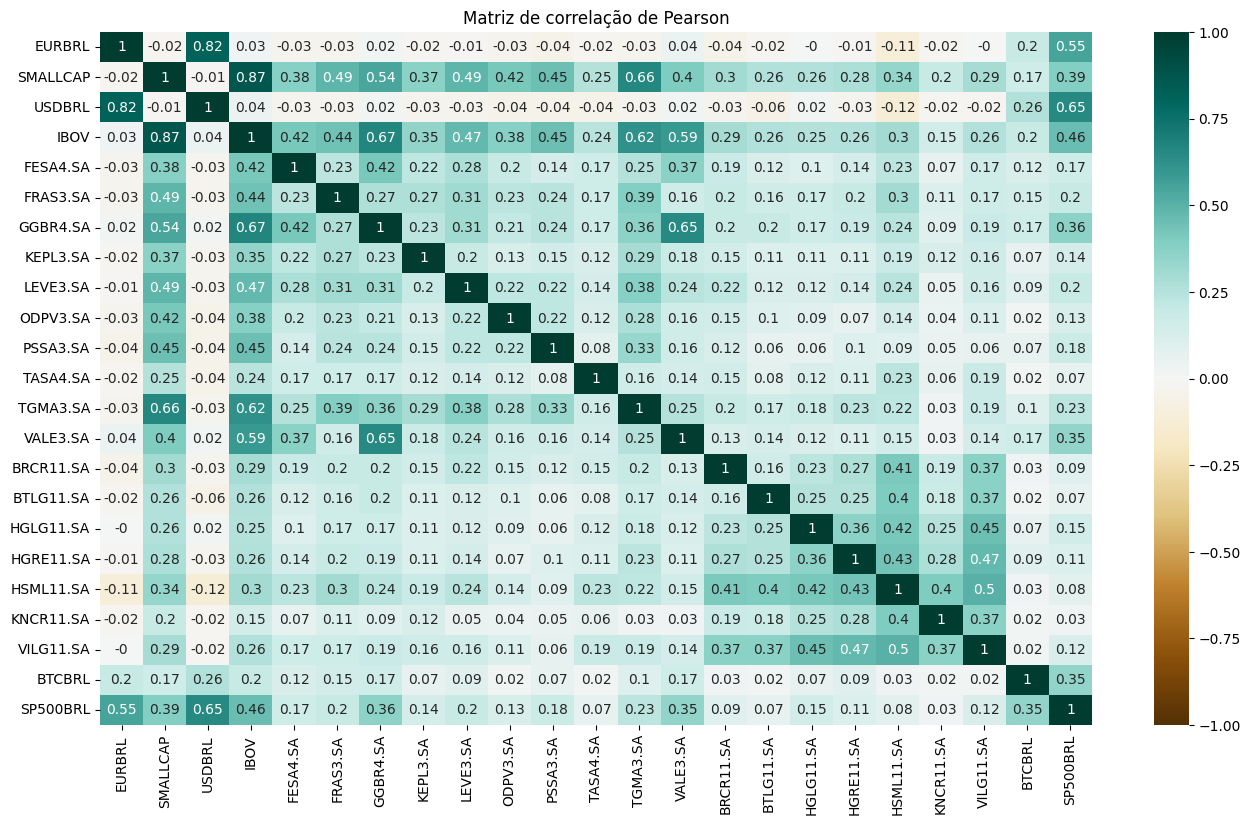

In [39]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao_pearson,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Pearson')

plt.show()

### 4.2 - Correlação de Kendall:

Quando usar: a correlação de Kendall é útil quando você está interessado em medir a concordância entre as classificações de duas variáveis. Ela também é não paramétrica e útil quando você não assume uma relação linear.

Vantagens: Boa para detectar relações monotônicas e é robusta a outliers.

Limitações: pode ser computacionalmente mais intensiva para grandes conjuntos de dados.

In [40]:
correlacao_kendall = retornos.corr(method= 'kendall')

In [41]:
correlacao_kendall

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,1.000000,-0.016925,0.644913,0.018813,-0.022175,-0.008814,0.003374,-0.023566,-0.010667,-0.032697,...,0.007589,-0.030093,-0.035490,-0.003743,-0.005999,-0.066656,-0.002442,0.009686,0.183382,0.412000
SMALLCAP,-0.016925,1.000000,-0.004896,0.622173,0.258956,0.278286,0.295022,0.240395,0.300767,0.283495,...,0.213644,0.138969,0.064298,0.084908,0.082987,0.095274,0.032056,0.055318,0.073746,0.187978
USDBRL,0.644913,-0.004896,1.000000,0.028103,-0.014740,-0.007027,0.006675,-0.018982,-0.017388,-0.028931,...,0.011627,-0.039065,-0.046365,-0.003972,-0.015187,-0.064977,0.000315,-0.011559,0.217412,0.510004
IBOV,0.018813,0.622173,0.028103,1.000000,0.280216,0.245824,0.418372,0.229172,0.283628,0.244907,...,0.372983,0.125974,0.077375,0.088069,0.077222,0.076983,0.029535,0.054227,0.096354,0.235738
FESA4.SA,-0.022175,0.258956,-0.014740,0.280216,1.000000,0.140852,0.272064,0.157406,0.168397,0.121574,...,0.232603,0.098500,0.061271,0.079981,0.071286,0.046145,0.023819,0.044805,0.066833,0.105362
FRAS3.SA,-0.008814,0.278286,-0.007027,0.245824,0.140852,1.000000,0.131254,0.160040,0.188549,0.128254,...,0.072326,0.089679,0.054886,0.057288,0.084770,0.108363,0.022655,0.053547,0.063848,0.086494
GGBR4.SA,0.003374,0.295022,0.006675,0.418372,0.272064,0.131254,1.000000,0.142135,0.166765,0.102784,...,0.455465,0.077304,0.058592,0.062264,0.051291,0.043874,0.023863,0.054511,0.085477,0.177271
KEPL3.SA,-0.023566,0.240395,-0.018982,0.229172,0.157406,0.160040,0.142135,1.000000,0.139487,0.095146,...,0.107064,0.063658,0.050092,0.059677,0.055524,0.071168,0.040657,0.044938,0.027650,0.065587
LEVE3.SA,-0.010667,0.300767,-0.017388,0.283628,0.168397,0.188549,0.166765,0.139487,1.000000,0.140041,...,0.123421,0.127600,0.038006,0.064666,0.062400,0.091087,0.003184,0.046740,0.061150,0.097716
ODPV3.SA,-0.032697,0.283495,-0.028931,0.244907,0.121574,0.128254,0.102784,0.095146,0.140041,1.000000,...,0.070301,0.077573,0.023426,0.012900,0.016835,0.067576,0.022691,0.015653,-0.011446,0.063861


In [42]:
correlacao_kendall = correlacao_kendall.round(2)

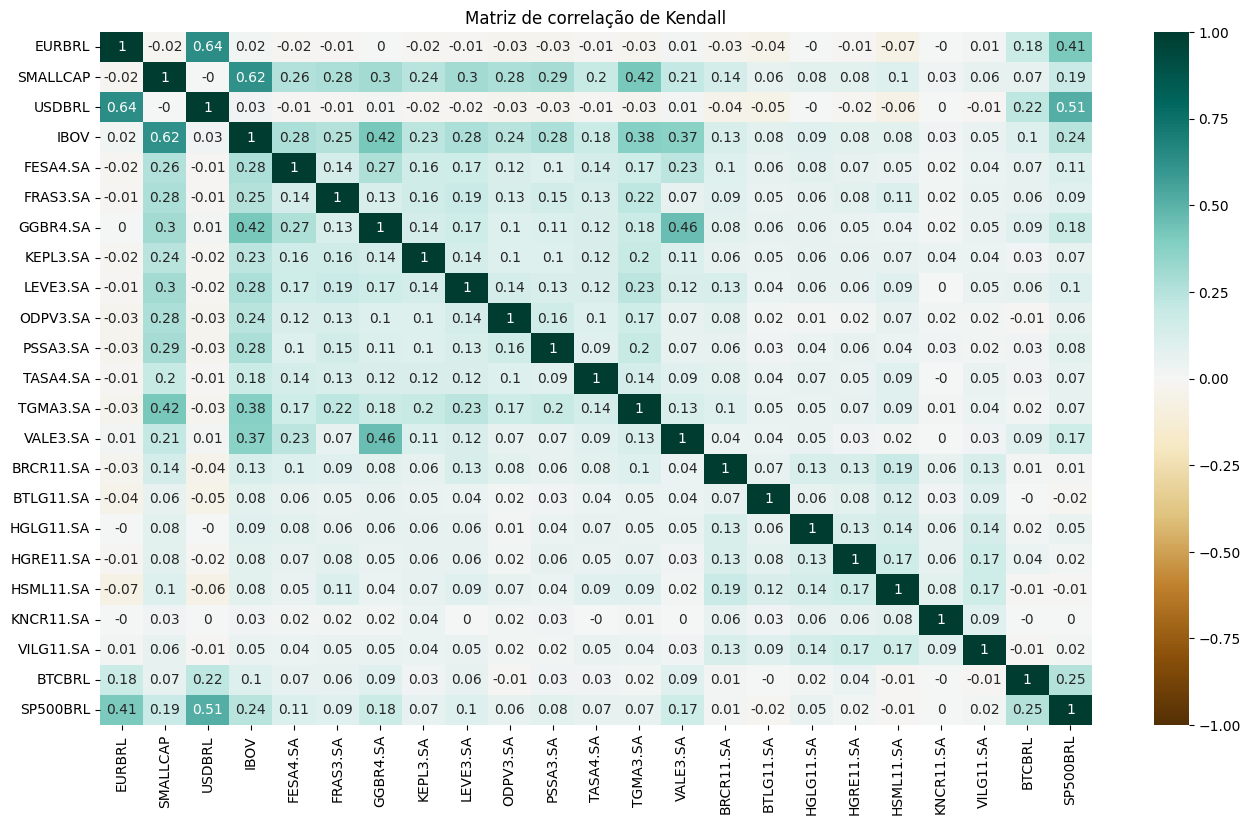

In [43]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao_kendall,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Kendall')

plt.show()

### 4.3 - Correlação de Spearman:

Quando usar: a correlação de Spearman é uma opção adequada quando você não tem certeza de que a relação entre as variáveis é linear.

Vantagens: é robusta a outliers e pode detectar relações monotônicas, mesmo que não sejam lineares.

Limitações: pode ser menos sensível a relações lineares claras.

In [44]:
correlacao_spearman = retornos.corr(method= 'spearman')

In [45]:
correlacao_spearman

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,1.000000,-0.024173,0.820187,0.028789,-0.032742,-0.013695,0.005463,-0.034376,-0.015532,-0.048001,...,0.011216,-0.044951,-0.053451,-0.005152,-0.009281,-0.098522,-0.003325,0.014822,0.270056,0.568916
SMALLCAP,-0.024173,1.000000,-0.006602,0.808535,0.374302,0.397210,0.425270,0.346655,0.429838,0.407188,...,0.311558,0.205497,0.095025,0.125954,0.121611,0.140932,0.048008,0.081374,0.109666,0.270652
USDBRL,0.820187,-0.006602,1.000000,0.042315,-0.021164,-0.010789,0.010244,-0.028030,-0.025902,-0.042789,...,0.017486,-0.059162,-0.068976,-0.005625,-0.022707,-0.096818,0.000461,-0.017155,0.318898,0.680227
IBOV,0.028789,0.808535,0.042315,1.000000,0.406335,0.354812,0.586484,0.332199,0.406411,0.354934,...,0.531013,0.186317,0.114252,0.129529,0.114103,0.113453,0.044853,0.080873,0.143264,0.339298
FESA4.SA,-0.032742,0.374302,-0.021164,0.406335,1.000000,0.206332,0.395696,0.230602,0.246147,0.180033,...,0.341758,0.146716,0.090897,0.118544,0.105326,0.068944,0.034963,0.066574,0.100138,0.155778
FRAS3.SA,-0.013695,0.397210,-0.010789,0.354812,0.206332,1.000000,0.192734,0.233196,0.272319,0.188470,...,0.106633,0.132567,0.081454,0.084866,0.124510,0.159513,0.033922,0.078459,0.094685,0.127069
GGBR4.SA,0.005463,0.425270,0.010244,0.586484,0.395696,0.192734,1.000000,0.210077,0.243712,0.152508,...,0.633563,0.114972,0.086150,0.091819,0.075596,0.065367,0.035738,0.079650,0.126964,0.258295
KEPL3.SA,-0.034376,0.346655,-0.028030,0.332199,0.230602,0.233196,0.210077,1.000000,0.204039,0.140182,...,0.158664,0.094321,0.075745,0.089347,0.080228,0.105463,0.060964,0.067217,0.040912,0.097499
LEVE3.SA,-0.015532,0.429838,-0.025902,0.406411,0.246147,0.272319,0.243712,0.204039,1.000000,0.205681,...,0.180792,0.187221,0.056084,0.096057,0.092212,0.133760,0.004911,0.069917,0.090866,0.143424
ODPV3.SA,-0.048001,0.407188,-0.042789,0.354934,0.180033,0.188470,0.152508,0.140182,0.205681,1.000000,...,0.104712,0.115719,0.034294,0.019532,0.024929,0.099865,0.033853,0.024395,-0.017359,0.094538


In [46]:
correlacao_spearman = correlacao_spearman.round(2)

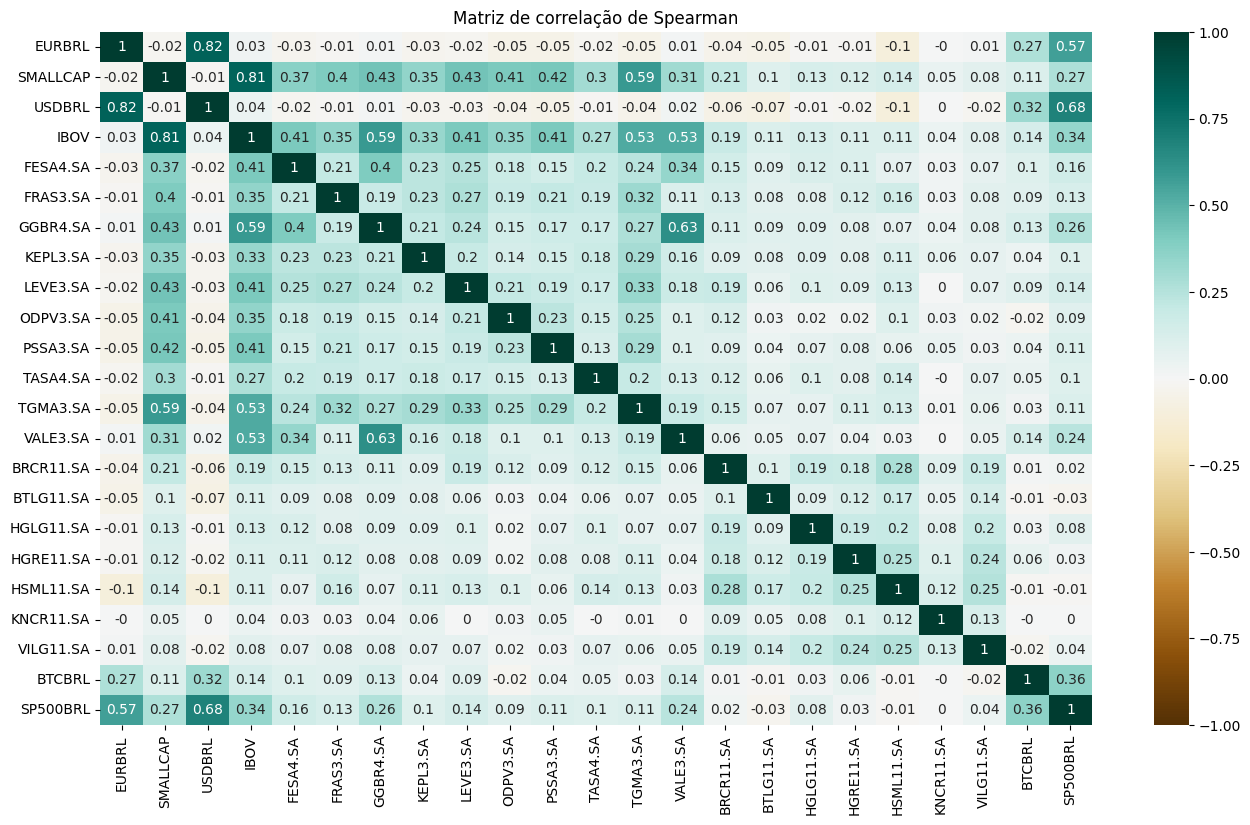

In [47]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao_spearman,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Spearman')

plt.show()

### 4.4 - Diferença de Pearson x Kendall:

Uma diferença positiva ao comparar a correlação  de Pearson com a correlação de Kendall (ou seja, Pearson - Kendall > 0) para ativos específicos pode ser interpretada da seguinte forma:

1 - Sensibilidade a Outliers: a correlação de Pearson é sensível a outlier, enquanto a correlação de Kendall é menos afetada por valores extremos.

2 - Relação linear: a correlação de Pearson mede especificamente a relação linear entre as variáveis, enquanto a correlação de Kendall avalia a concordância nas classificações das observações. Portanto, uma diferença positiva pode sugerir que a relação entre os ativos é mais próxima de uma relação linear do que uma relação monotônica.

3 - Assunções de Normalidade: a correlação de Pearson pressupõe que os dados sigam uma distribuição normal, enquanto a correlação de Kendall é não paramétrica e não faz essa suposição. Se os dados não seguem uma distribuição normal, a correlação de Pearson pode ser distorcida, resultando em uma diferença.

4 - Variações locais: a diferença positiva pode indicar que em certos intervalos ou subconjuntos de dados, a relação entre os ativos é mais linear do que em outros. Isso pode ser relevante se você estiver analisando dados financeiros em diferentes períodos ou contextos.

In [48]:
pearson_kendall = correlacao_pearson - correlacao_kendall

In [49]:
pearson_kendall

,EURBRL,SMALLCAP,USDBRL,IBOV,FESA4.SA,FRAS3.SA,GGBR4.SA,KEPL3.SA,LEVE3.SA,ODPV3.SA,...,VALE3.SA,BRCR11.SA,BTLG11.SA,HGLG11.SA,HGRE11.SA,HSML11.SA,KNCR11.SA,VILG11.SA,BTCBRL,SP500BRL
EURBRL,0.00,0.00,0.18,0.01,-0.01,-0.02,0.02,0.00,0.00,0.00,...,0.03,-0.01,0.02,0.00,0.00,-0.04,-0.02,-0.01,0.02,0.14
SMALLCAP,0.00,0.00,-0.01,0.25,0.12,0.21,0.24,0.13,0.19,0.14,...,0.19,0.16,0.20,0.18,0.20,0.24,0.17,0.23,0.10,0.20
USDBRL,0.18,-0.01,0.00,0.01,-0.02,-0.02,0.01,-0.01,-0.01,-0.01,...,0.01,0.01,-0.01,0.02,-0.01,-0.06,-0.02,-0.01,0.04,0.14
IBOV,0.01,0.25,0.01,0.00,0.14,0.19,0.25,0.12,0.19,0.14,...,0.22,0.16,0.18,0.16,0.18,0.22,0.12,0.21,0.10,0.22
FESA4.SA,-0.01,0.12,-0.02,0.14,0.00,0.09,0.15,0.06,0.11,0.08,...,0.14,0.09,0.06,0.02,0.07,0.18,0.05,0.13,0.05,0.06
FRAS3.SA,-0.02,0.21,-0.02,0.19,0.09,0.00,0.14,0.11,0.12,0.10,...,0.09,0.11,0.11,0.11,0.12,0.19,0.09,0.12,0.09,0.11
GGBR4.SA,0.02,0.24,0.01,0.25,0.15,0.14,0.00,0.09,0.14,0.11,...,0.19,0.12,0.14,0.11,0.14,0.20,0.07,0.14,0.08,0.18
KEPL3.SA,0.00,0.13,-0.01,0.12,0.06,0.11,0.09,0.00,0.06,0.03,...,0.07,0.09,0.06,0.05,0.05,0.12,0.08,0.12,0.04,0.07
LEVE3.SA,0.00,0.19,-0.01,0.19,0.11,0.12,0.14,0.06,0.00,0.08,...,0.12,0.09,0.08,0.06,0.08,0.15,0.05,0.11,0.03,0.10
ODPV3.SA,0.00,0.14,-0.01,0.14,0.08,0.10,0.11,0.03,0.08,0.00,...,0.09,0.07,0.08,0.08,0.05,0.07,0.02,0.09,0.03,0.07


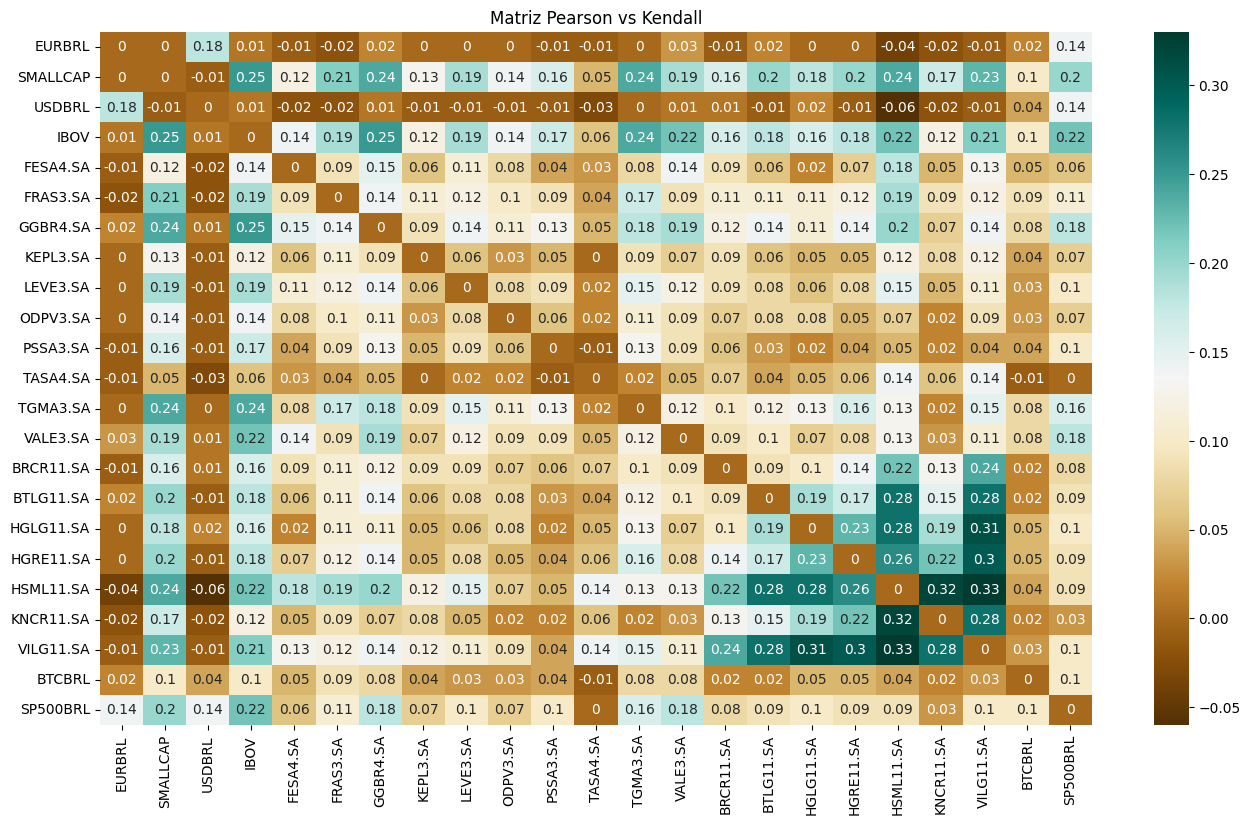

In [50]:
plt.figure(figsize = (16,9))

sns.heatmap(pearson_kendall,
             annot = True, cmap = 'BrBG')

plt.title('Matriz Pearson vs Kendall')

plt.show()

### 4.5 - Diferença de Pearson x Spearman:

Uma diferença menor entre a correlação de Pearson e a correlação de Spearman,

1 - Relação linear: a correlação de